# Business Problem

# Import Library

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [23]:
data = pd.read_csv(r"C:\Users\ALI\Desktop\Naresh  Datascience\Project_student_mark\Student_marks_self\student_info.csv")

In [24]:
data

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19
...,...,...
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05


In [25]:
print("Shape of raw dataset", data.shape)

Shape of raw dataset (200, 2)


# Cleaning data/ Preparing data for ML model


In [26]:
data.isnull().sum()    #  it check NaN value

study_hours      5
student_marks    0
dtype: int64

# Filling NUll value 

In [27]:
data=data.fillna(data.mean())

In [28]:
data.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [29]:
data.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19


# visualisation

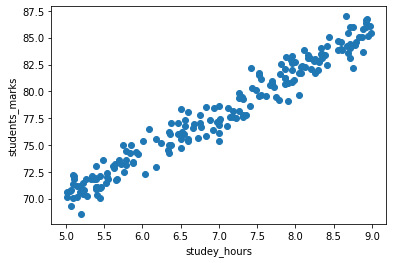

In [30]:

plt.scatter(x=data.study_hours,y=data.student_marks,marker='o')
plt.xlabel('studey_hours')
plt.ylabel('students_marks')
plt.show()

In [31]:
# Dependent & Independent var
y=data.drop('study_hours',axis=1)
x=data.drop('student_marks',axis=1)

In [32]:
y

,student_marks
0,78.50
1,76.74
2,78.68
3,71.82
4,84.19
...,...
195,81.67
196,84.68
197,86.75
198,78.05


# splitting  dataset

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=0)

In [34]:
print("shape of x_train" , x_train.shape)
print("shape of y_train ", y_train.shape)                 # shape of x_train, y_train

shape of x_train (160, 1)
shape of y_train  (160, 1)


In [35]:
print("shape of x_test", x_test.shape)
print("shape of y_test", y_test.shape)

shape of x_test (40, 1)
shape of y_test (40, 1)


# Model Building

In [36]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [37]:
lr.fit(x_train, y_train)                # fitting model in x_train, y_train

LinearRegression()

In [38]:
lr.coef_

array([[3.93037294]])

In [70]:
lr.intercept_

array([50.45063632])

In [71]:
m=3.93
c=50.45


In [72]:
y=m*6.56 +c

In [73]:
y

76.2308

In [74]:
y_pred = lr.predict(x_test)

In [78]:
y_pred

array([[83.50507271],
       [70.84927186],
       [72.93236952],
       [85.35234799],
       [73.20749562],
       [84.48766595],
       [80.12495199],
       [81.85431608],
       [80.91102657],
       [82.20804964],
       [78.98514384],
       [84.84139951],
       [77.84533568],
       [77.68812077],
       [83.22994661],
       [85.78468901],
       [84.9593107 ],
       [72.61793968],
       [78.71001773],
       [79.18166248],
       [84.2911473 ],
       [85.6274741 ],
       [74.74034107],
       [81.3433676 ],
       [72.02838374],
       [80.40007809],
       [78.98514384],
       [82.09013845],
       [77.94732382],
       [82.24735337],
       [75.44780819],
       [84.60557713],
       [71.63534645],
       [75.48711192],
       [70.29901965],
       [78.98514384],
       [75.32989701],
       [84.52696967],
       [74.07217767],
       [71.4388278 ]])

# check accuraccy

In [79]:
from sklearn.metrics import accuracy_score


In [81]:
#accuracy_score(y_test,y_pred)

# Convert again a new Dataframe with new column Student_marks _prediction 

In [86]:
new_data=pd.DataFrame(np.c_[x_test,y_test,y_pred],columns=['study_hours', 'students_marks','student_predicted_marks'])

In [87]:
new_data

,study_hours,students_marks,student_predicted_marks
0,8.410000,82.50,83.505073
1,5.190000,71.18,70.849272
2,5.720000,73.25,72.932370
3,8.880000,83.64,85.352348
4,5.790000,73.64,73.207496
5,8.660000,86.99,84.487666
6,7.550000,81.18,80.124952
7,7.990000,82.75,81.854316
8,7.750000,79.50,80.911027
9,8.080000,81.70,82.208050


# Fine Tune my model

In [90]:
print("Accuarcy is ",  lr.score(x_test,y_test)*100)

Accuarcy is  95.21841793508595


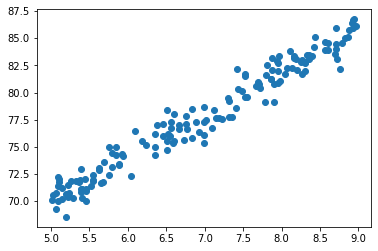

In [101]:
plt.scatter(x_train,y_train)

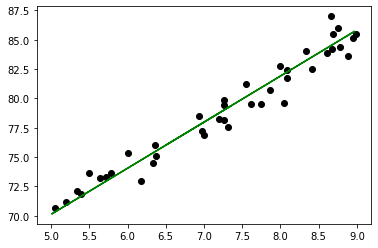

In [100]:
plt.scatter(x_test,y_test,color='black')
plt.plot(x_train,lr.predict(x_train), color='green')
plt.show()

# Present your Solution

# Save MOdel

In [104]:
import joblib

In [105]:
joblib.dump(lr,"student_marks_predictor.pkl")

['student_marks_predictor.pkl']

In [106]:
model = joblib.load('student_marks_predictor.pkl')

In [107]:
model

LinearRegression()

In [109]:
model.predict([[6]])

array([[74.03287394]])